# Korrelationskoeffizienten

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
heartData = pd.read_csv("heart-failure-prediction/heart.csv")
heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Entfernen unangegebener Cholersterin Beobachtungen und Frauen
heartData = heartData[(heartData["Sex"] != "F") & (heartData["Cholesterol"] != 0)]

In [4]:
# Umwandlung der Spalte "Sex" in nummerischen Wert
heartData["Sex"] = heartData["Sex"].apply(lambda x: 0 if x == "M" else 1)

# Umwandlung der Spalte "ST_Slope" in nummerischen Wert
heartData["ST_Slope"] = heartData["ST_Slope"].map({"Flat": 0, "Up": 1, "Down": 2})

# Umwandlung der Spalte "ChestPainType" in nummerischen Wert
heartData["ChestPainType"] = heartData["ChestPainType"].apply(lambda x: 0 if x == "TA" else (1 if x == "ATA" else (2 if x == "NAP" else 3)))

# Umwandlung der Spalte "RestingECG" in nummerischen Wert
heartData["RestingECG"] = heartData["RestingECG"].apply(lambda x: 0 if x == "Normal" else (1 if x == "ST" else 2))

# Umwandlung der Spalte "ExerciseAngina" in nummerischen Wert
heartData["ExerciseAngina"] = heartData["ExerciseAngina"].apply(lambda x: 0 if x == "N" else 1)

heartData.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,0,1,140,289,0,0,172,0,0.0,1,0
2,37,0,1,130,283,0,1,98,0,0.0,1,0
4,54,0,2,150,195,0,0,122,0,0.0,1,0
5,39,0,2,120,339,0,0,170,0,0.0,1,0
7,54,0,1,110,208,0,0,142,0,0.0,1,0


In [5]:
numericFeatures = ["Age","RestingBP","Cholesterol","MaxHR","Oldpeak","ST_Slope"]
numericHeartData = heartData.loc[:,numericFeatures].copy()

Text(0.5, 1.0, 'Korrelationskoeffizienten')

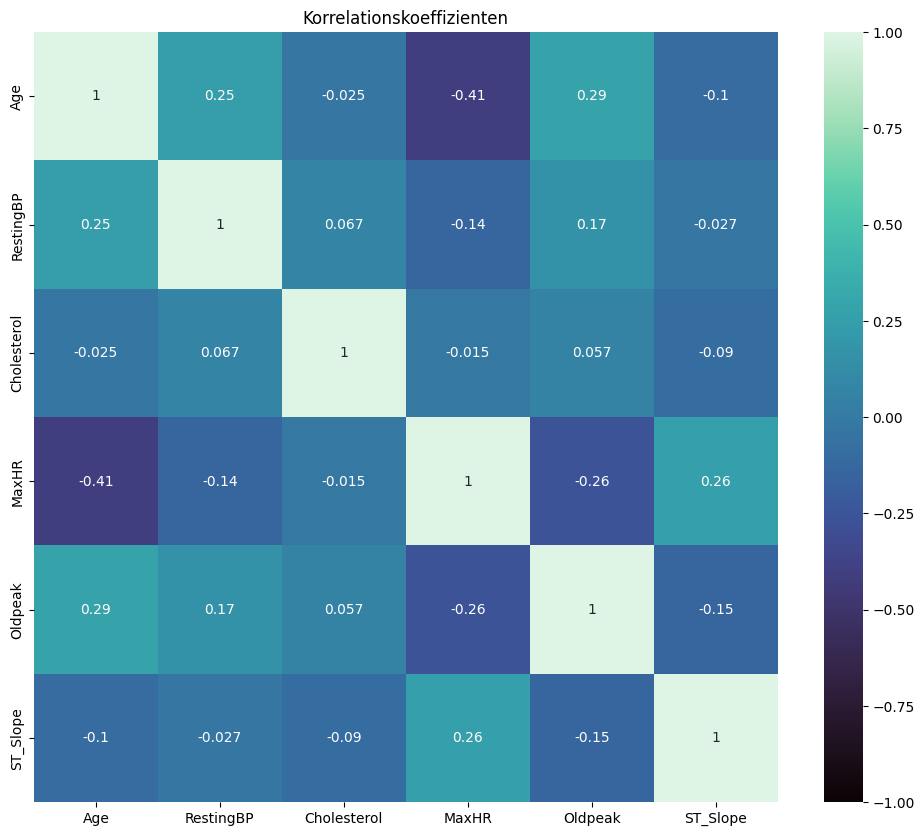

In [6]:
correlations = numericHeartData.corr()
plt.figure(figsize=(12,10))
sns.heatmap(correlations, annot=True, vmin=-1.0, cmap="mako")

plt.savefig("Korrelationskoeffizienten.png")
plt.title("Korrelationskoeffizienten")

# Lineare abhängigkeiten
Die größte negative Abhängigkeit besitzt Age-MaxHR, mit dem Wert -0.38 < 1. Es reicht jedoch nicht aus diese Werte zu vereinen.

In [7]:
print(correlations)

                  Age  RestingBP  Cholesterol     MaxHR   Oldpeak  ST_Slope
Age          1.000000   0.246486    -0.025410 -0.410259  0.286401 -0.099833
RestingBP    0.246486   1.000000     0.067036 -0.144201  0.166177 -0.026548
Cholesterol -0.025410   0.067036     1.000000 -0.015192  0.056633 -0.090423
MaxHR       -0.410259  -0.144201    -0.015192  1.000000 -0.262235  0.260360
Oldpeak      0.286401   0.166177     0.056633 -0.262235  1.000000 -0.145971
ST_Slope    -0.099833  -0.026548    -0.090423  0.260360 -0.145971  1.000000
